# Make input files for geoclaw_fgmax_test

Create synthetic topo files and fgmax input file fgmax_pts_island.data specified as a topo_type==3 file.

In [1]:
%matplotlib inline

In [2]:
from pylab import *
import os,sys
from clawpack.visclaw import colormaps, plottools
from clawpack.geoclaw import fgmax_tools, topotools

#from clawpack.visclaw.plottools import pcolorcells # to appear in 5.7.0
from matplotlib.pyplot import pcolormesh as pcolorcells # for now

In [3]:
zmin = -60.
zmax = 40.

land_cmap = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                     0.25:[0.0,1.0,0.0],
                                      0.5:[0.8,1.0,0.5],
                                      1.0:[0.8,0.5,0.2]})

sea_cmap = colormaps.make_colormap({ 0.0:[0,0,1], 1.:[.8,.8,1]})

cmap, norm = colormaps.add_colormaps((land_cmap, sea_cmap),
                                     data_limits=(zmin,zmax),
                                     data_break=0.)
                                     
sea_cmap_dry = colormaps.make_colormap({ 0.0:[1.0,0.7,0.7], 1.:[1.0,0.7,0.7]})
cmap_dry, norm_dry = colormaps.add_colormaps((land_cmap, sea_cmap_dry),
                                     data_limits=(zmin,zmax),
                                     data_break=0.)

## Run script to generate topo files

In [4]:
import maketopo
maketopo.maketopo()
maketopo.makeqinit()

theta_island =  220.0
Island is centered at: (14.465, 50.220)
Slope of shelf =  0.0
Slope of beach =  0.02
island topofile has 401 by 401 points
Slope of shelf =  0.0
Slope of beach =  0.02


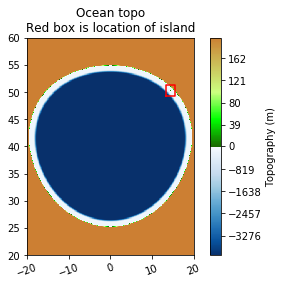

In [6]:
ocean_topo = topotools.Topography(path='ocean.tt3', topo_type=3)
island_topo = topotools.Topography(path='island.tt3', topo_type=3)
ocean_topo.plot()
plottools.plotbox(island_topo.extent, kwargs={'color':'r'})
title('Ocean topo\nRed box is location of island');

Text(0.5, 1.0, 'Island topo')

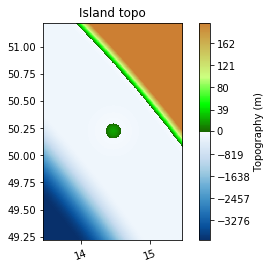

In [7]:
island_topo.plot()
title('Island topo')

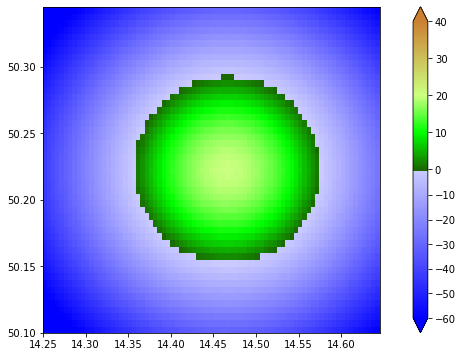

In [8]:
extent = [14.25, 14.65, 50.1, 50.35]
topo = island_topo.crop(extent)

figure(figsize=(12,6))
pcolorcells(topo.X, topo.Y, topo.Z, cmap=cmap, norm=norm)
colorbar(extend='both', ticks=arange(zmin,zmax+1,10))
gca().set_aspect(1./cos(50.2*pi/180.))

## Select only points in this region near shore 

Select the points where `Z > -15`m or `Z < 15`m elevation.

In [9]:
pts_chosen = where(logical_and(topo.Z>-15, topo.Z<15), 1, 0)

In [10]:
Zchosen = ma.masked_array(topo.Z, logical_not(pts_chosen))

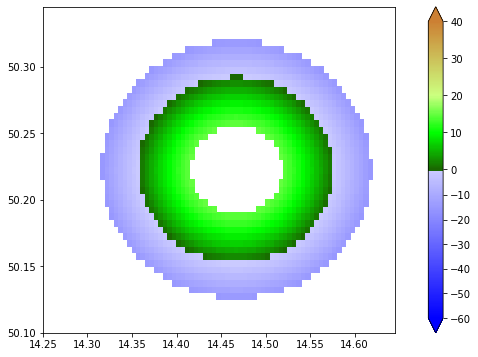

In [11]:
figure(figsize=(12,6))
pcolorcells(topo.X, topo.Y, Zchosen, cmap=cmap, norm=norm)
colorbar(extend='both', ticks=arange(zmin,zmax+1,10))
gca().set_aspect(1./cos(48*pi/180.))

### Write file indicating these points

Create a file that is like a topo DEM file with `topo_type==3` but with `Z` values equal to either 1 (if point is to be used as an fgmax point) or 0 (if not).

This file can be used together with setting `point_style==4` in `setrun.py`.

In [12]:
fname_fgmax_mask = 'fgmax_pts_island.data'
topo_fgmax_mask = topotools.Topography()

#topo_fgmax_mask.set_xyZ(topo.x, topo.y, chosen) # new in 5.7.0 will replace lines below
topo_fgmax_mask._x = topo.x
topo_fgmax_mask._y = topo.y
topo_fgmax_mask._Z = pts_chosen
topo_fgmax_mask.generate_2d_coordinates()

topo_fgmax_mask.write(fname_fgmax_mask, topo_type=3, Z_format='%1i')
print('Created %s' % fname_fgmax_mask)

Created fgmax_pts_island.data
